In [1]:
import jax.numpy as jnp
import jax
import numpy as np
import matplotlib.pyplot as plt

In [31]:
@jax.jit
def delta_hat(phi_val, eps=0.1):
    """Smeared out delta function for use in the integral kernel."""
    return jnp.where(
        (0 <= phi_val) & (phi_val <= eps),
        1/eps + jnp.cos(jnp.pi * phi_val / eps) / eps,
        0)


In [55]:
def circle_sdf(x):
    """Signed distance function for a circle."""
    return jnp.linalg.norm(x) - 1

def box_sdf(x):
    """Signed distance function for a box."""
    # Rotate the box by 45 degrees
    x = jnp.array([[jnp.cos(jnp.pi/4), -jnp.sin(jnp.pi/4)],
                   [jnp.sin(jnp.pi/4), jnp.cos(jnp.pi/4)]]).dot(x)
    return jnp.linalg.norm(x, 1) - 2 / jnp.sqrt(2)

In [56]:
sdf = box_sdf
sdf_grad = jax.grad(sdf)

In [61]:
@jax.jit
def integrand(x):
    return delta_hat(sdf(x)) * jnp.linalg.norm(sdf_grad(x))

# Sample integrand on a grid and plot
grid_bounds = ((-1.5, 1.5), (-1.5, 1.5))
x = np.linspace(grid_bounds[0][0], grid_bounds[0][1], 1000)
y = np.linspace(grid_bounds[1][0], grid_bounds[1][1], 1000)
X, Y = np.meshgrid(x, y)
Z = np.zeros_like(X)

for i in range(X.shape[0]):
    for j in range(X.shape[1]):
        Z[i, j] = integrand(np.array([X[i, j], Y[i, j]]))

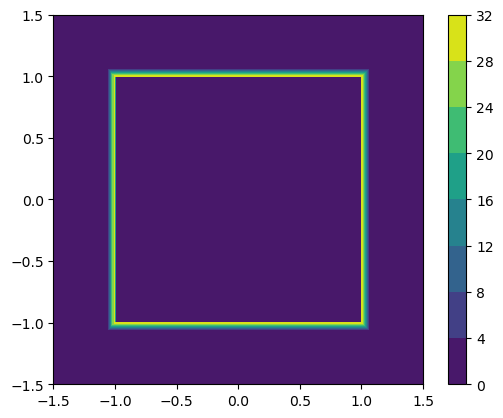

In [62]:
# Plot the integrand
plt.figure()
plt.contourf(X, Y, Z)
# Set aspect ratio to 1
plt.gca().set_aspect('equal', adjustable='box')
plt.colorbar()
plt.show()